<a href="https://colab.research.google.com/github/sonupp13/MY-PROJECTS-IN-NATURAL-LANGUAGE-PROCESSING/blob/main/SENTIMENT_ANALYSIS_PROJECT_ON_AMAZON_REVIEWS_SONU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SENTIMENT ANALYSIS USING NLP
importing important librarires such as

1.  pandas
2.  numpy
3.  matplotlib
4.  seaborn
5.  nltk

Here we are using mainly - NLTK the powerful library having many test pre processing techniques.

**NLTK**


NLTK, or Natural Language Toolkit, is a Python library widely used for processing human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, among other tasks.

Key features of NLTK include:

Tokenization: Breaking text into individual words or sentences.
Stemming and Lemmatization: Reducing words to their root or base forms.
Part-of-Speech Tagging: Assigning grammatical tags to words based on their role in a sentence.
Named Entity Recognition: Identifying and categorizing entities such as names of people, organizations, and locations.
Parsing: Analyzing the grammatical structure of sentences.
WordNet Integration: Access to WordNet, a lexical database of English words and their semantic relationships.
Corpora: A wide range of text corpora for training and testing natural language processing algorithms.
Machine Learning Algorithms: Integration with machine learning algorithms for text classification, clustering, and other tasks.


*NOW WE CAN GO THROUGH IMPORTANT STEPS IN THE PROGRAMME*

**Data loading**

Due to some mistakes like "ParserError: Error tokenizing data. C error: EOF inside string," indicates that there is a string that isn't properly closed in your CSV file. This often happens when there is a mismatch in quotation marks, causing the parser to interpret a string as continuing beyond the end of the file (EOF stands for End Of File). I've cleaned the dataset by skipping some of the datas that are having missing terms,values or even quotations.

**Visualising**

Visualising star based review counts.

**Tokenization**

nltk.download('punkt')

tokens = nltk.word_tokenize

breaks down text into individual words or sentences, making it easier to analyze and process.

**Part of speech (POS)**

import nltk

nltk.download('averaged_perceptron_tagger')


process of assigning grammatical tags to words in a sentence based on their syntactic roles, such as nouns, verbs, adjectives, etc. This is crucial for understanding the grammatical structure of text.

**Chunking**

import nltk

nltk.download('words')

nltk.download('maxent_ne_chunker')

entities = nltk.chunk.ne_chunk(tagged)

groups words into "chunks" based on their POS tags. This process helps identify meaningful phrases or entities in the text, such as noun phrases or verb phrases.

In summary:

Tokenization: Dividing text into smaller units like words or sentences.
POS Tagging: Assigning grammatical tags to words based on their roles in sentences.
Chunking: Grouping words into meaningful chunks based on their POS tags.


**VADER **
Valence Aware Dictionary and sEntiment Reasoner is a lexicon and rule-based sentiment analysis tool designed for analyzing the sentiment of text data, especially in social media contexts. It uses a bag-of-words approach coupled with rules and heuristics to determine the sentiment of text.


# Lets see breakdown of an important step

**from nltk.sentiment import SentimentIntensityAnalyzer**

**from tqdm.notebook import tqdm**

**import nltk**

**nltk.download('vader_lexicon')**

**sia = SentimentIntensityAnalyzer()**

from nltk.sentiment import SentimentIntensityAnalyzer: Importing the SentimentIntensityAnalyzer class from the NLTK's sentiment module.

from tqdm.notebook import tqdm: Importing tqdm, a library used to create progress bars for tasks such as iterating over a sequence.

import nltk: Importing the NLTK library.

nltk.download('vader_lexicon'): Downloading the VADER lexicon, which is required for sentiment analysis using VADER.

sia = SentimentIntensityAnalyzer(): Initializing the SentimentIntensityAnalyzer object as sia. This object can be used to analyze the sentiment of text data using VADER.

**Lets see another important step**
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

**WE RUN THE SIA POLARITY SCORE ON THE ENTIRE DATASET TO ANALYSE THE SENTIMENT IN THE TEXT.**

# AS THE LAST STEP WE VISUALISE THE STAR RATINGS ON THE BASIS OF SENTIMENT ANALYSED FROM THE TEXTS IN THE REVIEWS AS NEGATIVE , POSITIVE , NEUTRAL AND COMPOUND SCORES TO GET A MORE UNDERSTANDABLE WAY.










In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [13]:
import pandas as pd
from io import StringIO

# Define the file path
file_path = "/content/drive/MyDrive/Colab Notebooks/Reviews.csv"

# Define the path for the clean file
clean_file_path = "/content/drive/MyDrive/Colab Notebooks/Clean_Reviews.csv"

# Read the file, skipping rows causing ParserError, and write a clean CSV file
with open(file_path, 'r', encoding='utf-8') as file:
    clean_lines = []
    for line_number, line in enumerate(file, start=1):
        try:
            pd.read_csv(StringIO(line))
            clean_lines.append(line)
        except pd.errors.ParserError:
            print(f"Skipping row {line_number} due to parsing error.")
            pass

# Write the clean lines to a new CSV file
with open(clean_file_path, 'w', encoding='utf-8') as clean_file:
    clean_file.writelines(clean_lines)

# Read the clean CSV file into a DataFrame
df = pd.read_csv(clean_file_path)

# Now you can work with the DataFrame as usual

Skipping row 82687 due to parsing error.


In [31]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
82680,82681,B005UP1M4I,A1J3ONVA1G0C5E,robert,11,14,1,1326672000,dont use this in the Nespresso Essenza,"Before I bought the Essenza, I saw all of the ..."
82681,82682,B005UP1M4I,A2KP45DO3RY4RG,CheeryToes,3,3,4,1332201600,using my Illy and so happy!,"It took some experimentation, but much like Ke..."
82682,82683,B005UP1M4I,A2EIFLLQG0ARMX,frank9814,2,2,1,1330905600,no good,"I tried to use it took me,a lot of time to fil..."
82683,82684,B005UP1M4I,AL1AEH5ANCZK2,Ned D. Ewart,2,2,1,1329350400,These do not work in new nespresso machines,Nespresso capsules have a domed bottom. These...


In [15]:
df.shape

(82685, 10)

QUICK EDA ON BASIS OF STAR RATINGS

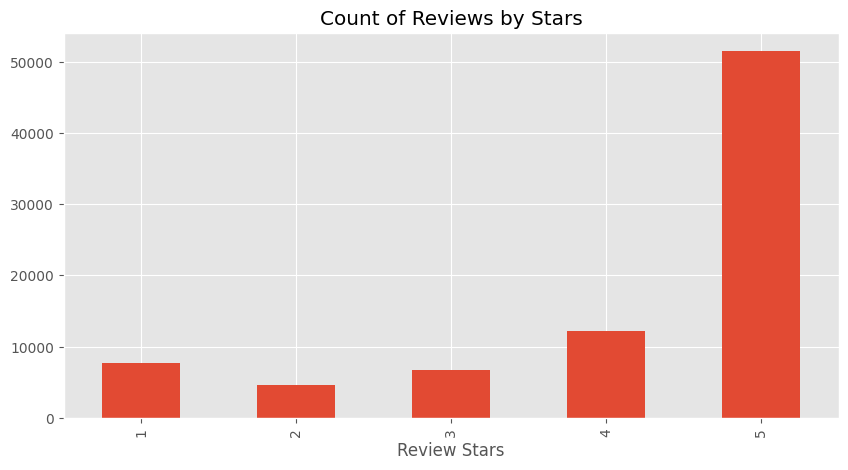

In [17]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

NLTK

In [18]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [19]:
#tokenization
nltk.download('punkt')
tokens = nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [20]:
#part of speech tagging
import nltk
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [21]:
#chunking
import nltk
nltk.download('words')
nltk.download('maxent_ne_chunker')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach for sentiment analysis
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:

Stop words are removed

each word is scored and combined to a total score.

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import nltk
nltk.download('vader_lexicon')


sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [23]:
sia.polarity_scores('I am so happy!')


{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [24]:
sia.polarity_scores('This is the worst thing ever.')


{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [25]:
sia.polarity_scores(example)


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [26]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/82685 [00:00<?, ?it/s]

In [27]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [28]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


ploting vader data

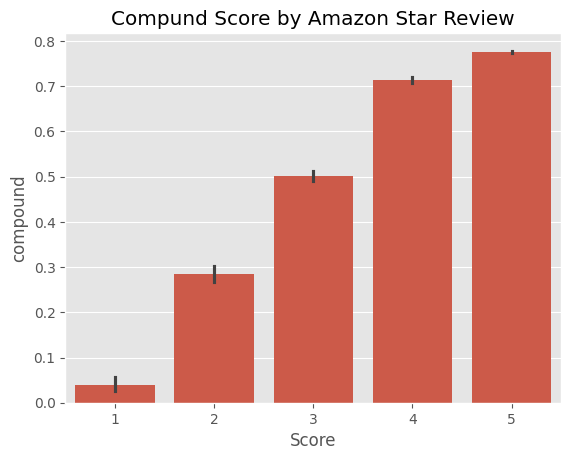

In [29]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

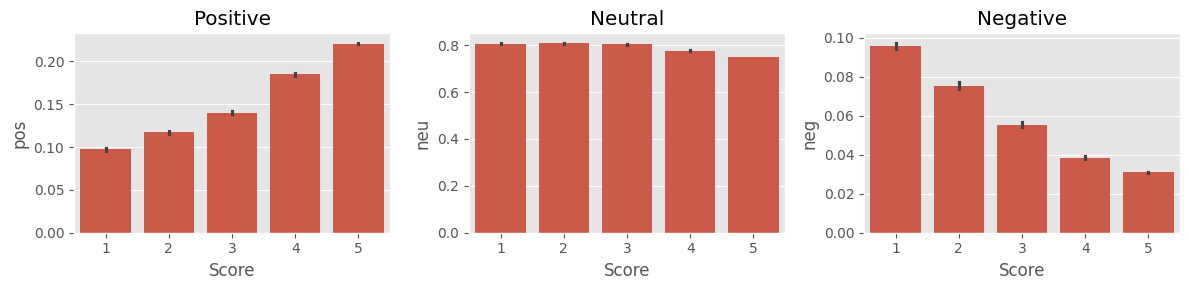

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()